This notebook represents my work on Coursera Data Science Professional Certificate Capstone project. 
The aim of the project is to choose a publicly available data set with traffic accident data, and create a ML model based on it for predicting the severity of any potential accident.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Predicting Accident Severity

## Overview of the original data

For building the model, the traffic accident data from UK government from 2018 for Leeds is used. This is publicly available data set.

In [3]:
df_2018 = pd.read_csv('https://query.data.world/s/ltzs6dkwyzm7qem2cdbc4vrocal5nq')

In [4]:
df_2018.shape

(1995, 21)

In [5]:
df_2018.head()

,Accident Fields_Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,...,Local Authority,Vehicle Fields_Reference Number,Vehicle Number,Type of Vehicle,Casualty Fields_Reference Number,Casualty Veh No,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,51B0230,433936,428874,1,11/01/2018,700,6,U,1,4,...,E08000035,51B0230,1,9,51B0230,1,3,3,2,87
1,51B0349,430076,433872,1,11/01/2018,855,6,U,2,1,...,E08000035,51B0349,1,11,51B0349,1,2,3,2,60
2,51B0349,430076,433872,1,11/01/2018,855,6,U,2,1,...,E08000035,51B0349,1,11,51B0349,1,2,3,2,51
3,51B0349,430076,433872,1,11/01/2018,855,6,U,2,1,...,E08000035,51B0349,1,11,51B0349,1,2,3,2,50
4,51B0349,430076,433872,1,11/01/2018,855,6,U,2,1,...,E08000035,51B0349,1,11,51B0349,1,2,3,2,51


In [6]:
df_2018.columns

Index(['Accident Fields_Reference Number', 'Grid Ref: Easting',
       'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date',
       'Time (24hr)', '1st Road Class', '1st Road Class & No', 'Road Surface',
       'Lighting Conditions', 'Weather Conditions', 'Local Authority',
       'Vehicle Fields_Reference Number', 'Vehicle Number', 'Type of Vehicle',
       'Casualty Fields_Reference Number', 'Casualty Veh No', 'Casualty Class',
       'Casualty Severity', 'Sex of Casualty', 'Age of Casualty'],
      dtype='object')

In [7]:
df_2018.dtypes

Accident Fields_Reference Number    object
Grid Ref: Easting                    int64
Grid Ref: Northing                   int64
Number of Vehicles                   int64
Accident Date                       object
Time (24hr)                          int64
1st Road Class                       int64
1st Road Class & No                 object
Road Surface                         int64
Lighting Conditions                  int64
Weather Conditions                   int64
Local Authority                     object
Vehicle Fields_Reference Number     object
Vehicle Number                       int64
Type of Vehicle                      int64
Casualty Fields_Reference Number    object
Casualty Veh No                      int64
Casualty Class                       int64
Casualty Severity                    int64
Sex of Casualty                      int64
Age of Casualty                      int64
dtype: object

In [8]:
# run a 'describe' funtion on non-categorical features
df_2018[['Accident Fields_Reference Number','Number of Vehicles','Accident Date','Time (24hr)','Age of Casualty']].describe(include='all')

,Accident Fields_Reference Number,Number of Vehicles,Accident Date,Time (24hr),Age of Casualty
count,1995,1995.000000,1995,1995.000000,1995.000000
unique,1548,NaN,354,NaN,NaN
top,58K1318,NaN,30/06/2018,NaN,NaN
freq,9,NaN,19,NaN,NaN
mean,NaN,1.919298,NaN,1409.368421,36.993985
std,NaN,0.723584,NaN,505.175755,18.856635
min,NaN,1.000000,NaN,0.000000,1.000000
25%,NaN,1.000000,NaN,1047.500000,23.000000
50%,NaN,2.000000,NaN,1503.000000,35.000000
75%,NaN,2.000000,NaN,1754.000000,50.000000


In [9]:
# review the descriptions file that accompanies the data csv file
df_descriptions = pd.read_csv('https://query.data.world/s/gfafx3a433phshsqg47jukqisk5k6b')
df_descriptions

,Feature Group,Code,Description
0,1st Road Class,1,Motorway
1,1st Road Class,2,A(M)
2,1st Road Class,3,A
3,1st Road Class,4,B
4,1st Road Class,5,C
5,1st Road Class,6,Unclassified
6,Road Surface,1,Dry
7,Road Surface,2,Wet / Damp
8,Road Surface,3,Snow
9,Road Surface,4,Frost / Ice


There are many column in the original data set that are not relevant or helpful to achieve the objective, like for example any internal reference numbers, hidden vehicle numbers, local authority dealing with accident etc

In [10]:
# Drop columns that are not relevant for the data to simplify the data set
df_2018.drop(columns=['Grid Ref: Easting',
              'Grid Ref: Northing',
              '1st Road Class & No',
              'Local Authority',
              'Vehicle Fields_Reference Number', 
              'Vehicle Number',
              'Casualty Fields_Reference Number', 
              'Casualty Veh No',
              'Casualty Class'],inplace=True)
df_2018.rename(columns={'Accident Fields_Reference Number':'Accident Ref No'}, inplace=True)
df_2018.head()

,Accident Ref No,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Severity,Sex of Casualty,Age of Casualty
0,51B0230,1,11/01/2018,700,6,1,4,1,9,3,2,87
1,51B0349,1,11/01/2018,855,6,2,1,1,11,3,2,60
2,51B0349,1,11/01/2018,855,6,2,1,1,11,3,2,51
3,51B0349,1,11/01/2018,855,6,2,1,1,11,3,2,50
4,51B0349,1,11/01/2018,855,6,2,1,1,11,3,2,51


## FEATURE BY FEATURE INSIGHTS

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Casualty Severity

Probably one of the most important features of the data set because Casualty Severity showing the extent of injuries is definitely a factor of assessing the severity of the accident

In [12]:
df_2018['Casualty Severity'].value_counts()

3    1658
2     311
1      26
Name: Casualty Severity, dtype: int64

In [13]:
## Add a column with severity description to dataset
df_2018['Casualty Severity Description'] = np.where(df_2018['Casualty Severity'] == 1, 'Fatal Injuries', 
                                    np.where(df_2018['Casualty Severity'] == 2, 'Serious Injuries', 
                                    np.where(df_2018['Casualty Severity'] == 3, 'Light Injuries', 'NA'
                                    )))

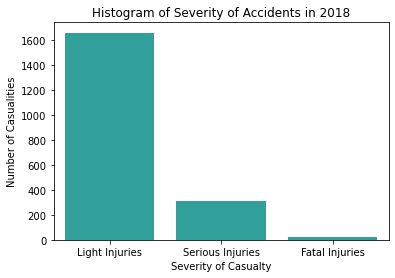

In [14]:
sns.countplot(x='Casualty Severity Description', data=df_2018, color='lightseagreen')
plt.title('Histogram of Severity of Accidents in 2018') 
plt.ylabel('Number of Casualities')
plt.xlabel('Severity of Casualty')
plt.show()

In [15]:
# how many of all the Casualty Severities are serious or fatal?
df_2018['Casualty Severity'].value_counts(normalize=True)

3    0.831078
2    0.155890
1    0.013033
Name: Casualty Severity, dtype: float64

Because the number of Fatal Injuries is very small, I merged the Fatal and Serious Injuries together and called the category Serious or Fatal Injury.  
I also turned the Casual Severity score around, where Light Injuries would be valued as 1 and Serious and Fatal Injuries as 2 (before the Light Injury was value 3 which I found counter intuitive)

In [16]:
df_2018['Casualty Severity Description']=df_2018['Casualty Severity Description'].replace('Serious Injuries','Serious or Fatal Injuries')
df_2018['Casualty Severity Description']=df_2018['Casualty Severity Description'].replace('Fatal Injuries','Serious or Fatal Injuries')
df_2018['Casualty Severity']=df_2018['Casualty Severity'].replace(1,2)
df_2018['Casualty Severity']=df_2018['Casualty Severity'].replace(3,1)
df_2018[['Casualty Severity','Casualty Severity Description']].tail(10)

,Casualty Severity,Casualty Severity Description
1985,1,Light Injuries
1986,1,Light Injuries
1987,2,Serious or Fatal Injuries
1988,1,Light Injuries
1989,1,Light Injuries
1990,2,Serious or Fatal Injuries
1991,1,Light Injuries
1992,1,Light Injuries
1993,1,Light Injuries
1994,1,Light Injuries


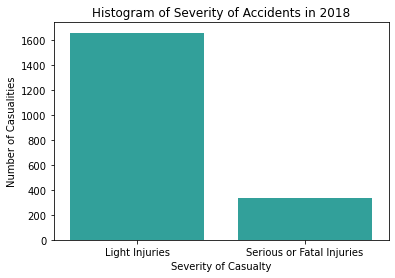

In [17]:
sns.countplot(x='Casualty Severity Description', data=df_2018, color='lightseagreen')
plt.title('Histogram of Severity of Accidents in 2018') 
plt.ylabel('Number of Casualities')
plt.xlabel('Severity of Casualty')
plt.show()

### Number of Vehicles per Accident

Also an important number and definitely contributing into the overall seriousness of accident. The mroe vehicles involved, the greater damage to the property and disruption of traffic.

In [18]:
df_2018['Number of Vehicles'].value_counts(normalize=True,sort=False)

1    0.251629
2    0.618546
3    0.097744
4    0.025564
5    0.005013
6    0.000501
7    0.001003
Name: Number of Vehicles, dtype: float64

Text(0, 0.5, 'Count of Casualties')

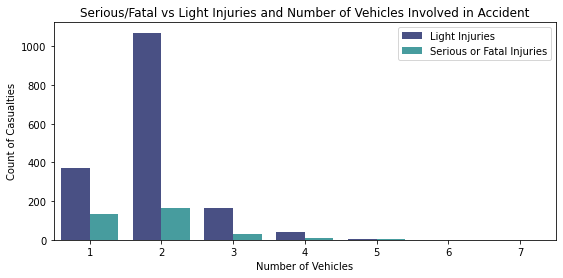

In [19]:
# Is there are correlation between casualty severity and number of vehicles involved?
plt.figure(figsize=(9,4))
sns.countplot(x='Number of Vehicles', hue='Casualty Severity Description', data=df_2018, palette='mako')
plt.legend(loc='upper right')
plt.title('Serious/Fatal vs Light Injuries and Number of Vehicles Involved in Accident')
plt.ylabel('Count of Casualties')

In [20]:
No_Vehicles_Severity=df_2018.groupby(['Number of Vehicles'])['Casualty Severity Description'].value_counts(normalize=True)
No_Vehicles_Severity

Number of Vehicles  Casualty Severity Description
1                   Light Injuries                   0.739044
                    Serious or Fatal Injuries        0.260956
2                   Light Injuries                   0.867909
                    Serious or Fatal Injuries        0.132091
3                   Light Injuries                   0.851282
                    Serious or Fatal Injuries        0.148718
4                   Light Injuries                   0.823529
                    Serious or Fatal Injuries        0.176471
5                   Light Injuries                   0.600000
                    Serious or Fatal Injuries        0.400000
6                   Light Injuries                   1.000000
7                   Light Injuries                   0.500000
                    Serious or Fatal Injuries        0.500000
Name: Casualty Severity Description, dtype: float64

### Number of Casualties per Accident

Number of people injured in each accident is also definitely a factor that should be included in assessing the overall severity of the accident. There is no number of people listed in dataset, but it can be easily found counting the accident reference numbers appointed to each casualty: the casualties with the same accident ref number we involved in the same accident.

In [21]:
# add a new column to dataframe noting the number of casualties involved in each accident 
# in order to do that I count the same accident ref numbers in col 1 and enter the count as the Number of Casualties
df_2018['Number of Casualties'] = df_2018.groupby(['Accident Ref No'])['Number of Vehicles'].transform('count')
df_2018[['Accident Ref No','Number of Casualties']].head(10)

,Accident Ref No,Number of Casualties
0,51B0230,1
1,51B0349,5
2,51B0349,5
3,51B0349,5
4,51B0349,5
5,51B0349,5
6,51B0632,1
7,51B0975,1
8,51B1212,1
9,51B1241,1


In [22]:
df_2018['Number of Casualties'].value_counts(normalize=True, sort=False)

1    0.621554
2    0.217544
3    0.094737
4    0.036090
5    0.012531
6    0.006015
7    0.007018
9    0.004511
Name: Number of Casualties, dtype: float64

Text(0, 0.5, 'Count of Casualties')

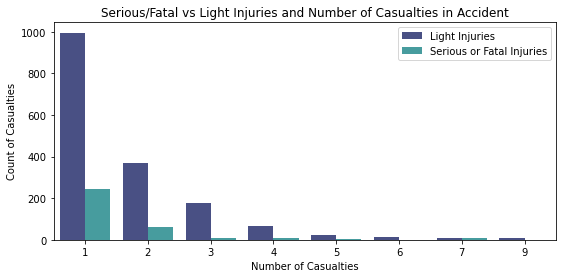

In [23]:
# Is there a correlation between Casualty Severity and how many people were injured in accident?
plt.figure(figsize=(9,4))
sns.countplot(x='Number of Casualties', hue='Casualty Severity Description', data=df_2018, palette='mako')
plt.legend(loc='upper right')
plt.title('Serious/Fatal vs Light Injuries and Number of Casualties in Accident')
plt.ylabel('Count of Casualties')

In [24]:
No_Casualties_Severity=df_2018.groupby(['Number of Casualties'])['Casualty Severity Description'].value_counts(normalize=True)
No_Casualties_Severity

Number of Casualties  Casualty Severity Description
1                     Light Injuries                   0.802419
                      Serious or Fatal Injuries        0.197581
2                     Light Injuries                   0.854839
                      Serious or Fatal Injuries        0.145161
3                     Light Injuries                   0.941799
                      Serious or Fatal Injuries        0.058201
4                     Light Injuries                   0.902778
                      Serious or Fatal Injuries        0.097222
5                     Light Injuries                   0.840000
                      Serious or Fatal Injuries        0.160000
6                     Light Injuries                   1.000000
7                     Light Injuries                   0.500000
                      Serious or Fatal Injuries        0.500000
9                     Light Injuries                   1.000000
Name: Casualty Severity Description, dtype: float64

### Time of Day 

Might be important factor as there are different amount of traffic on roads during different time of day. And people have different cognitive abilities: people tend to be more alert in the morning, and have more fatigue during the end of day and night.
Data set records the time in 24h format that can be converted into Time of Day category.

In [25]:
# break down the 24h times into times of day
df_2018['Time of day'] = np.where((df_2018['Time (24hr)'] <500),'Night',             
                                np.where((df_2018['Time (24hr)'] >2230), 'Night',
                                np.where(((df_2018['Time (24hr)'] >=500) & (df_2018['Time (24hr)'] <700)), 'Early Morning', 
                                np.where(((df_2018['Time (24hr)'] >=700) & (df_2018['Time (24hr)'] <930)), 'Morning Rush Hour',
                                np.where(((df_2018['Time (24hr)'] >=930) & (df_2018['Time (24hr)'] <1200)), 'Late Morning',
                                np.where(((df_2018['Time (24hr)'] >=1200) & (df_2018['Time (24hr)'] <1600)), 'Afternoon',
                                np.where(((df_2018['Time (24hr)'] >=1600) & (df_2018['Time (24hr)'] <1900)), 'Afternoon Rush Hour',
                                np.where(((df_2018['Time (24hr)'] >=1900) & (df_2018['Time (24hr)'] <=2230)), 'Evening', 'NA'
                             ))))))))

In [26]:
df_2018['Time of day'].value_counts(ascending=False)

Afternoon              559
Afternoon Rush Hour    499
Evening                276
Morning Rush Hour      260
Late Morning           208
Night                  158
Early Morning           35
Name: Time of day, dtype: int64

In [27]:
# See if there are correlations between number of people injured and /or severity of the injuries
Time_of_day_casualties=df_2018.groupby(['Time of day'])['Casualty Severity Description'].value_counts()
Time_of_day_danger=pd.DataFrame(Time_of_day_casualties.reset_index(name = "Casualty_Count"))
Time_of_day_danger

,Time of day,Casualty Severity Description,Casualty_Count
0,Afternoon,Light Injuries,476
1,Afternoon,Serious or Fatal Injuries,83
2,Afternoon Rush Hour,Light Injuries,419
3,Afternoon Rush Hour,Serious or Fatal Injuries,80
4,Early Morning,Light Injuries,30
5,Early Morning,Serious or Fatal Injuries,5
6,Evening,Light Injuries,221
7,Evening,Serious or Fatal Injuries,55
8,Late Morning,Light Injuries,181
9,Late Morning,Serious or Fatal Injuries,27


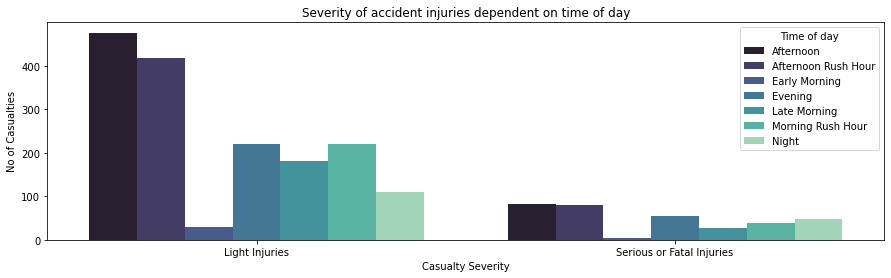

In [28]:
plt.figure(figsize=(15,4))
sns.barplot(x='Casualty Severity Description', 
            y='Casualty_Count', 
            hue = 'Time of day', 
            data=Time_of_day_danger, 
            orient='v',
           palette='mako')
plt.title('Severity of accident injuries dependent on time of day') 
plt.ylabel('No of Casualties')
plt.xlabel('Casualty Severity')
plt.show()

In [29]:
Possibility_Time_of_day=df_2018['Time of day'].value_counts(normalize=True)
Possibility_Time_of_day

Afternoon              0.280201
Afternoon Rush Hour    0.250125
Evening                0.138346
Morning Rush Hour      0.130326
Late Morning           0.104261
Night                  0.079198
Early Morning          0.017544
Name: Time of day, dtype: float64

In [30]:
Severity_Time_of_day=df_2018.groupby(['Casualty Severity Description'])['Time of day'].value_counts(normalize=True)
Severity_Time_of_day

Casualty Severity Description  Time of day        
Light Injuries                 Afternoon              0.287093
                               Afternoon Rush Hour    0.252714
                               Evening                0.133293
                               Morning Rush Hour      0.133293
                               Late Morning           0.109168
                               Night                  0.066345
                               Early Morning          0.018094
Serious or Fatal Injuries      Afternoon              0.246291
                               Afternoon Rush Hour    0.237389
                               Evening                0.163205
                               Night                  0.142433
                               Morning Rush Hour      0.115727
                               Late Morning           0.080119
                               Early Morning          0.014837
Name: Time of day, dtype: float64

### Seasonality

Seasonality might affect the accident severity because of different daytime hours, weather and road conditions, as well as number of drivers and their skills on the road. Add in a column to reflect seasonality based on the Accident Date feature.

In [31]:
# make sure the date is understood as date by pandas
df_2018['Accident Date'] = pd.to_datetime(df_2018['Accident Date'])
df_2018['Accident Date'].head()

0   2018-11-01
1   2018-11-01
2   2018-11-01
3   2018-11-01
4   2018-11-01
Name: Accident Date, dtype: datetime64[ns]

In [32]:
# add in the Season column
df_2018['Season'] = np.where(((df_2018['Accident Date'] >= '2018-01-01') & (df_2018['Accident Date'] <= '2018-02-28')), 'Winter', 
                                np.where(((df_2018['Accident Date'] >= '2018-12-01') & (df_2018['Accident Date'] <= '2018-12-31')), 'Winter',
                                np.where(((df_2018['Accident Date'] >= '2018-03-01') & (df_2018['Accident Date'] <= '2018-05-31')), 'Spring',
                                np.where(((df_2018['Accident Date'] >= '2018-06-01') & (df_2018['Accident Date'] <= '2018-08-31')), 'Summer',
                                np.where(((df_2018['Accident Date'] >= '2018-09-01') & (df_2018['Accident Date'] <= '2018-11-30')), 'Autumn', 'NA'
                                )))))
df_2018[['Accident Date','Season']].tail()

,Accident Date,Season
1990,2018-12-31,Winter
1991,2018-12-31,Winter
1992,2018-12-31,Winter
1993,2018-12-31,Winter
1994,2018-12-31,Winter


In [33]:
# See if there's a relationship between the seasonality, number of casualties and the severity of injuries
Seasonal_casualties=df_2018.groupby(['Season'])['Casualty Severity Description'].value_counts()
Seasonal_danger=pd.DataFrame(Seasonal_casualties.reset_index(name = "Casualty_Count"))
Seasonal_danger

,Season,Casualty Severity Description,Casualty_Count
0,Autumn,Light Injuries,434
1,Autumn,Serious or Fatal Injuries,88
2,Spring,Light Injuries,424
3,Spring,Serious or Fatal Injuries,96
4,Summer,Light Injuries,422
5,Summer,Serious or Fatal Injuries,84
6,Winter,Light Injuries,378
7,Winter,Serious or Fatal Injuries,69


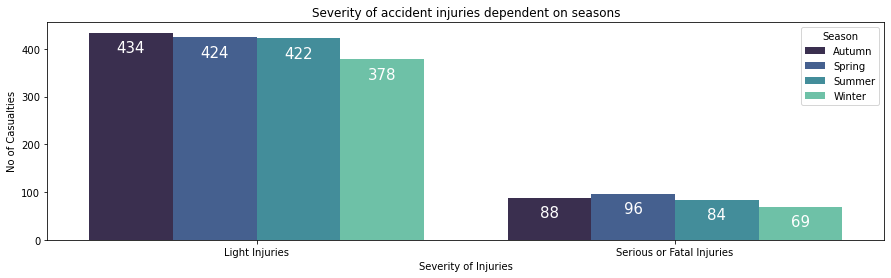

In [34]:
plt.figure(figsize=(15,4))
ax=sns.barplot(x='Casualty Severity Description', 
            y='Casualty_Count', 
            hue = 'Season', 
            data=Seasonal_danger, 
            orient='v',
           palette='mako')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='white', xytext=(0, -15),
                 textcoords='offset points')
plt.title('Severity of accident injuries dependent on seasons') 
plt.ylabel('No of Casualties')
plt.xlabel('Severity of Injuries')
plt.show()

In [35]:
Seasonal_casualties=df_2018.groupby(['Season'])['Casualty Severity Description'].value_counts(normalize=True)
Seasonal_casualties

Season  Casualty Severity Description
Autumn  Light Injuries                   0.831418
        Serious or Fatal Injuries        0.168582
Spring  Light Injuries                   0.815385
        Serious or Fatal Injuries        0.184615
Summer  Light Injuries                   0.833992
        Serious or Fatal Injuries        0.166008
Winter  Light Injuries                   0.845638
        Serious or Fatal Injuries        0.154362
Name: Casualty Severity Description, dtype: float64

In [36]:
# have to add in another column for seasonal numeric value for the KNN model that cannot use timestamp data
df_2018['Season Code'] = np.where((df_2018['Season'] == 'Spring'), 1, 
                                np.where((df_2018['Season'] == 'Summer'), 2,
                                np.where((df_2018['Season'] == 'Autumn'), 3,
                                np.where((df_2018['Season'] == 'Winter'), 4, 'NA'
                                ))))
df_2018['Season Code'].value_counts(sort=False)

4    447
2    506
3    522
1    520
Name: Season Code, dtype: int64

### Road Class

Investigate if road class might affect the number of injured people or severity of injuries.

In [37]:
##enter the descriptions of Road Class into df so we can clearly plot it with labels
df_2018['1st Road Class Description'] = np.where(df_2018['1st Road Class'] == 1, 'Motorway', 
                                    np.where(df_2018['1st Road Class'] == 2, 'A', 
                                    np.where(df_2018['1st Road Class'] == 3, 'A(M)', 
                                    np.where(df_2018['1st Road Class'] == 4, 'B',
                                    np.where(df_2018['1st Road Class'] == 5, 'C',
                                    np.where(df_2018['1st Road Class'] == 6, 'Unclassified', 'NA'
                                    ))))))

In [38]:
df_2018['1st Road Class Description'].value_counts(normalize=True).sort_values(ascending=False)

Unclassified    0.533333
A(M)            0.318797
Motorway        0.079198
B               0.034586
A               0.031579
C               0.002506
Name: 1st Road Class Description, dtype: float64

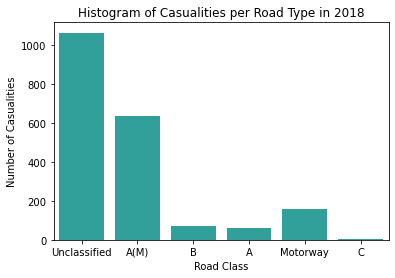

In [39]:
sns.countplot(x='1st Road Class Description', data=df_2018, color='lightseagreen')
plt.title('Histogram of Casualities per Road Type in 2018') 
plt.ylabel('Number of Casualities')
plt.xlabel('Road Class')
plt.show()

As most of the data in this column is Unclassified, it's no use for me, so I drop the Road Class and Road Class Descriptions form DataFrame.

In [40]:
df_2018.drop(columns=['1st Road Class Description','1st Road Class'], inplace=True)
df_2018.head()

,Accident Ref No,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Severity,Sex of Casualty,Age of Casualty,Casualty Severity Description,Number of Casualties,Time of day,Season,Season Code
0,51B0230,1,2018-11-01,700,1,4,1,9,1,2,87,Light Injuries,1,Morning Rush Hour,Autumn,3
1,51B0349,1,2018-11-01,855,2,1,1,11,1,2,60,Light Injuries,5,Morning Rush Hour,Autumn,3
2,51B0349,1,2018-11-01,855,2,1,1,11,1,2,51,Light Injuries,5,Morning Rush Hour,Autumn,3
3,51B0349,1,2018-11-01,855,2,1,1,11,1,2,50,Light Injuries,5,Morning Rush Hour,Autumn,3
4,51B0349,1,2018-11-01,855,2,1,1,11,1,2,51,Light Injuries,5,Morning Rush Hour,Autumn,3


### Road Surface

Road surface condition that was recorded at the time of the accident. Most probably contributes to the number as well as severity of accidents.

In [41]:
##enter the descriptions of Road Surface into df so we can clearly plot it with labels
df_2018['Road Surface Description'] = np.where(df_2018['Road Surface'] == 1, 'Dry', 
                                    np.where(df_2018['Road Surface'] == 2, 'Wet / Damp', 
                                    np.where(df_2018['Road Surface'] == 3, 'Snow', 
                                    np.where(df_2018['Road Surface'] == 4, 'Frost/Ice',
                                    np.where(df_2018['Road Surface'] == 5, 'Flood', 'NA'
                                    )))))

## do a quick count
df_2018['Road Surface Description'].value_counts(normalize=True)

Dry           0.764912
Wet / Damp    0.213033
Snow          0.011028
Frost/Ice     0.010025
Flood         0.001003
Name: Road Surface Description, dtype: float64

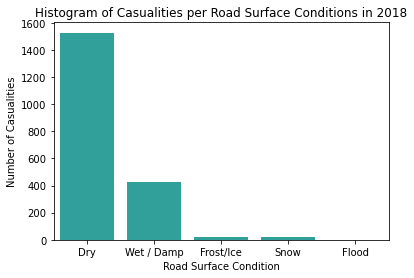

In [42]:
sns.countplot(x='Road Surface Description', data=df_2018, color='lightseagreen')
plt.title('Histogram of Casualities per Road Surface Conditions in 2018') 
plt.ylabel('Number of Casualities')
plt.xlabel('Road Surface Condition')
plt.show()

In [43]:
# Figure out if there is a possible correlation between number of casualties and severity of injuries and road conditions
Casualty_Severity_counts=df_2018.groupby(['Road Surface Description'])['Casualty Severity Description'].value_counts(ascending=False)
Surface_Severity=pd.DataFrame(Casualty_Severity_counts.reset_index(name = "Casualty_Count").sort_values(by=['Casualty_Count'],ascending=False))
Surface_Severity.head(10)

,Road Surface Description,Casualty Severity Description,Casualty_Count
0,Dry,Light Injuries,1271
7,Wet / Damp,Light Injuries,350
1,Dry,Serious or Fatal Injuries,255
8,Wet / Damp,Serious or Fatal Injuries,75
5,Snow,Light Injuries,19
3,Frost/Ice,Light Injuries,16
4,Frost/Ice,Serious or Fatal Injuries,4
6,Snow,Serious or Fatal Injuries,3
2,Flood,Light Injuries,2


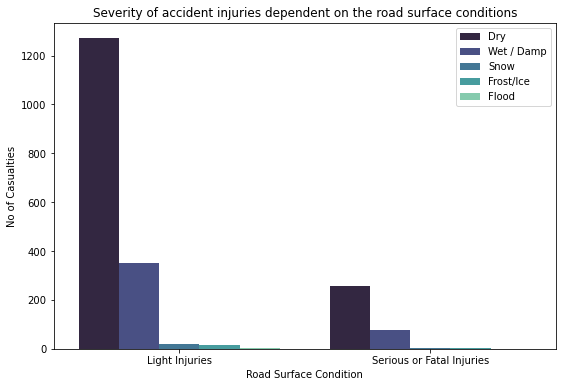

In [44]:
plt.figure(figsize=(9,6))
ax=sns.barplot(x='Casualty Severity Description', 
            y='Casualty_Count', 
            hue = 'Road Surface Description', 
            data=Surface_Severity, 
            orient='v',
           palette='mako')
plt.legend(loc='upper right')
plt.title('Severity of accident injuries dependent on the road surface conditions') 
plt.ylabel('No of Casualties')
plt.xlabel('Road Surface Condition')
plt.show()

In [45]:
Casualty_Severity_counts=df_2018.groupby(['Road Surface Description'])['Casualty Severity Description'].value_counts(normalize=True)
Casualty_Severity_counts

Road Surface Description  Casualty Severity Description
Dry                       Light Injuries                   0.832896
                          Serious or Fatal Injuries        0.167104
Flood                     Light Injuries                   1.000000
Frost/Ice                 Light Injuries                   0.800000
                          Serious or Fatal Injuries        0.200000
Snow                      Light Injuries                   0.863636
                          Serious or Fatal Injuries        0.136364
Wet / Damp                Light Injuries                   0.823529
                          Serious or Fatal Injuries        0.176471
Name: Casualty Severity Description, dtype: float64

### Lighting Conditions

Lighting conditions also might clearly be a factor for more, or more severe, accidents

In [46]:
# Simplify the original categories, create a new column with Lighting Descriptions data
df_2018['Lighting Conditions']=df_2018['Lighting Conditions'].replace(2,1)
df_2018['Lighting Conditions']=df_2018['Lighting Conditions'].replace(3,1)
df_2018['Lighting Conditions']=df_2018['Lighting Conditions'].replace(4,2)
df_2018['Lighting Conditions']=df_2018['Lighting Conditions'].replace(5,3)
df_2018['Lighting Conditions']=df_2018['Lighting Conditions'].replace(6,3)
df_2018['Lighting Conditions']=df_2018['Lighting Conditions'].replace(7,4)
df_2018['Lighting Description'] = np.where(df_2018['Lighting Conditions'] == 1, 'Daylight', 
                                np.where(df_2018['Lighting Conditions'] == 2, 'Dark, street lights', 
                                np.where(df_2018['Lighting Conditions'] == 3, 'Dark, no lights', 
                                np.where(df_2018['Lighting Conditions'] == 4, 'Dark, lighting conditions unknown','NA'
                                ))))

In [47]:
Lighting=df_2018['Lighting Conditions'].value_counts()
Lighting

1    1443
2     458
3      54
4      40
Name: Lighting Conditions, dtype: int64

In [48]:
# Is there are relationship between Lighting Conditions and number and severity of casualties?
Casualty_Severity_Lighting=df_2018.groupby(['Lighting Description'])['Casualty Severity Description'].value_counts()
Lighting_Severity=pd.DataFrame(Casualty_Severity_Lighting.reset_index(name = "Casualty_Count").sort_values(by=['Casualty_Count'],ascending=False))
Lighting_Severity.head(10)

,Lighting Description,Casualty Severity Description,Casualty_Count
6,Daylight,Light Injuries,1213
4,"Dark, street lights",Light Injuries,365
7,Daylight,Serious or Fatal Injuries,230
5,"Dark, street lights",Serious or Fatal Injuries,93
2,"Dark, no lights",Light Injuries,43
0,"Dark, lighting conditions unknown",Light Injuries,37
3,"Dark, no lights",Serious or Fatal Injuries,11
1,"Dark, lighting conditions unknown",Serious or Fatal Injuries,3


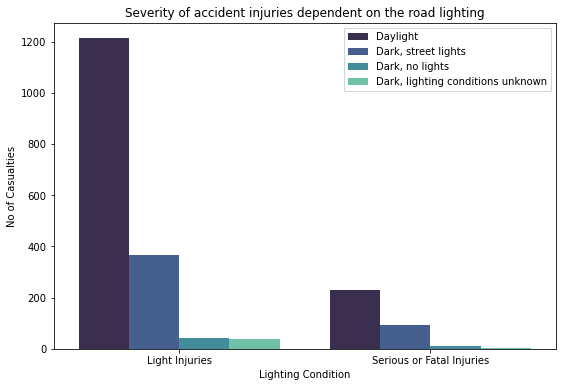

In [49]:
plt.figure(figsize=(9,6))
ax=sns.barplot(x='Casualty Severity Description', 
            y='Casualty_Count', 
            hue = 'Lighting Description', 
            data=Lighting_Severity, 
            orient='v',
           palette='mako')
plt.legend(loc='upper right')
plt.title('Severity of accident injuries dependent on the road lighting') 
plt.ylabel('No of Casualties')
plt.xlabel('Lighting Condition')
plt.show()

In [50]:
Lighting_casualties=df_2018.groupby(['Lighting Description'])['Casualty Severity Description'].value_counts(normalize=True, ascending=False)
Lighting_casualties

Lighting Description               Casualty Severity Description
Dark, lighting conditions unknown  Light Injuries                   0.925000
                                   Serious or Fatal Injuries        0.075000
Dark, no lights                    Light Injuries                   0.796296
                                   Serious or Fatal Injuries        0.203704
Dark, street lights                Light Injuries                   0.796943
                                   Serious or Fatal Injuries        0.203057
Daylight                           Light Injuries                   0.840610
                                   Serious or Fatal Injuries        0.159390
Name: Casualty Severity Description, dtype: float64

### Weather Conditions

Weather conditions in UK are strongly seasonal and definitely have potential of affecting the accident rate and severity

In [51]:
# reduce the number of categories and add a new column with description values
df_2018['Weather Conditions']=df_2018['Weather Conditions'].replace(9,8)
df_2018['Weather Description'] = np.where(df_2018['Weather Conditions'] == 1, 'Fine', 
                                np.where(df_2018['Weather Conditions'] == 2, 'Rain', 
                                np.where(df_2018['Weather Conditions'] == 3, 'Snow', 
                                np.where(df_2018['Weather Conditions'] == 4, 'Windy',
                                np.where(df_2018['Weather Conditions'] == 5, 'Rain & Wind',
                                np.where(df_2018['Weather Conditions'] == 6, 'Snow & Wind',
                                np.where(df_2018['Weather Conditions'] == 7, 'Fog',
                                np.where(df_2018['Weather Conditions'] == 8, 'Unknown','NA'
                                ))))))))
Weather_Description=df_2018['Weather Description'].value_counts(ascending=False)
Weather_Description

Fine           1757
Rain            166
Rain & Wind      20
Snow             16
Windy            16
Unknown          12
Fog               4
Snow & Wind       4
Name: Weather Description, dtype: int64

In [52]:
# Is there a relationship between weather and accident rate and severity of casualties?
Casualty_Severity_Weather=df_2018.groupby(['Weather Description'])['Casualty Severity Description'].value_counts()
Weather_Severity=pd.DataFrame(Casualty_Severity_Weather.reset_index(name = "Casualty_Count").sort_values(by=['Casualty_Count'],ascending=False))
Weather_Severity.head(10)

,Weather Description,Casualty Severity Description,Casualty_Count
0,Fine,Light Injuries,1462
1,Fine,Serious or Fatal Injuries,295
4,Rain,Light Injuries,141
5,Rain,Serious or Fatal Injuries,25
6,Rain & Wind,Light Injuries,16
8,Snow,Light Injuries,13
13,Windy,Light Injuries,13
11,Unknown,Light Injuries,6
12,Unknown,Serious or Fatal Injuries,6
7,Rain & Wind,Serious or Fatal Injuries,4


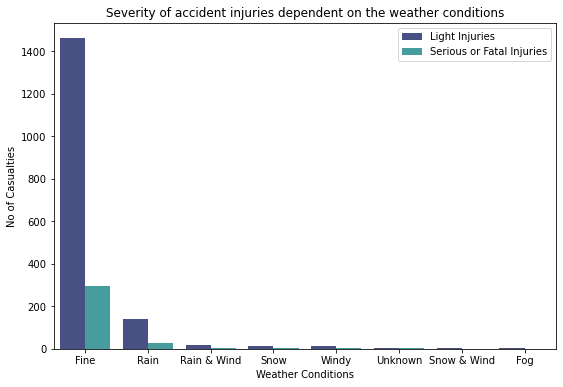

In [53]:
plt.figure(figsize=(9,6))
ax=sns.barplot(x='Weather Description', 
            y='Casualty_Count', 
            hue = 'Casualty Severity Description', 
            data=Weather_Severity, 
            orient='v',
           palette='mako')
plt.legend(loc='upper right')
plt.title('Severity of accident injuries dependent on the weather conditions') 
plt.ylabel('No of Casualties')
plt.xlabel('Weather Conditions')
plt.show()

In [54]:
Weather_casualties_timeofday=df_2018.groupby(['Time of day'])['Weather Description'].value_counts(normalize=True, ascending=False)
Weather_casualties_timeofday

Time of day          Weather Description
Afternoon            Fine                   0.908766
                     Rain                   0.057245
                     Windy                  0.008945
                     Rain & Wind            0.007156
                     Fog                    0.005367
                     Snow                   0.005367
                     Snow & Wind            0.003578
                     Unknown                0.003578
Afternoon Rush Hour  Fine                   0.879760
                     Rain                   0.078156
                     Rain & Wind            0.018036
                     Snow                   0.010020
                     Windy                  0.008016
                     Unknown                0.004008
                     Snow & Wind            0.002004
Early Morning        Fine                   0.742857
                     Rain                   0.171429
                     Rain & Wind            0.028571
     

In [55]:
# take a look if maybe weather together with time of day affects the accident rate or severity
Seasonal_weather=df_2018.groupby(['Season'])['Weather Description'].value_counts(normalize=True,ascending=False)
Seasonal_weather

Season  Weather Description
Autumn  Fine                   0.871648
        Rain                   0.093870
        Unknown                0.011494
        Windy                  0.011494
        Rain & Wind            0.007663
        Fog                    0.003831
Spring  Fine                   0.888462
        Rain                   0.076923
        Rain & Wind            0.019231
        Fog                    0.003846
        Unknown                0.003846
        Windy                  0.003846
        Snow                   0.001923
        Snow & Wind            0.001923
Summer  Fine                   0.922925
        Rain                   0.059289
        Windy                  0.007905
        Rain & Wind            0.003953
        Snow                   0.003953
        Unknown                0.001976
Winter  Fine                   0.834452
        Rain                   0.105145
        Snow                   0.029083
        Rain & Wind            0.008949
        Wind

<Figure size 1080x432 with 0 Axes>

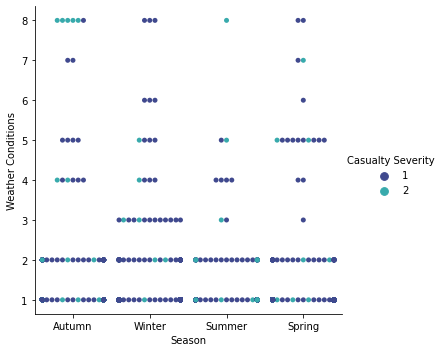

In [56]:
# maybe the weather and season have cumulative effect on number of casualties and severit<y of accidents?
plt.figure(figsize=(15,6))
sns.catplot(x="Season", y="Weather Conditions", hue="Casualty Severity", kind="swarm", data=df_2018, palette='mako')

### Vehicle Type

It could be that vehicles that travel slower or are bigger (e.g. bus or tractor) cause less casualties than vehicles that are faster and smaller (e.g. motorbikes)

In [57]:
# concentrate & simplify the current values
# add a new column with vehicle descriptions
df_2018['Type of Vehicle']=df_2018['Type of Vehicle'].replace([2,22],1)
df_2018['Type of Vehicle']=df_2018['Type of Vehicle'].replace([3,4,97],2)
df_2018['Type of Vehicle']=df_2018['Type of Vehicle'].replace([8,9,10],3)
df_2018['Type of Vehicle']=df_2018['Type of Vehicle'].replace(11,4)
df_2018['Type of Vehicle']=df_2018['Type of Vehicle'].replace(16,5)
df_2018['Type of Vehicle']=df_2018['Type of Vehicle'].replace(17,6)
df_2018['Type of Vehicle']=df_2018['Type of Vehicle'].replace(18,7)
df_2018['Type of Vehicle']=df_2018['Type of Vehicle'].replace([19,20,21],8)
df_2018['Type of Vehicle']=df_2018['Type of Vehicle'].replace([14,15,90],9)
df_2018['Vehicle Description'] = np.where(df_2018['Type of Vehicle'] == 1, 'Bicycle/Scooter', 
                                np.where(df_2018['Type of Vehicle'] == 2, 'Motorcycle', 
                                np.where(df_2018['Type of Vehicle'] == 3, 'Car', 
                                np.where(df_2018['Type of Vehicle'] == 4, 'Bus',
                                np.where(df_2018['Type of Vehicle'] == 5, 'Horse',
                                np.where(df_2018['Type of Vehicle'] == 6, 'Big & Slow',
                                np.where(df_2018['Type of Vehicle'] == 7, 'Tram/Light Rail',
                                np.where(df_2018['Type of Vehicle'] == 8, 'Truck',
                                np.where(df_2018['Type of Vehicle'] == 9, 'Other','NA'
                                )))))))))
Vehicle_Descriptions=df_2018['Vehicle Description'].value_counts(ascending=False)
Vehicle_Descriptions

Car                1337
Bicycle/Scooter     314
Bus                 127
Motorcycle           93
Truck                80
Horse                40
Other                 4
Name: Vehicle Description, dtype: int64

In [58]:
Casualty_Severity_Vehicle=df_2018.groupby(['Vehicle Description'])['Casualty Severity Description'].value_counts()
Vehicle_Severity=pd.DataFrame(Casualty_Severity_Vehicle.reset_index(name = "Casualty_Count").sort_values(by=['Casualty_Count'],ascending=False))
Vehicle_Severity

,Vehicle Description,Casualty Severity Description,Casualty_Count
4,Car,Light Injuries,1158
0,Bicycle/Scooter,Light Injuries,245
5,Car,Serious or Fatal Injuries,179
2,Bus,Light Injuries,115
1,Bicycle/Scooter,Serious or Fatal Injuries,69
12,Truck,Light Injuries,68
8,Motorcycle,Light Injuries,49
9,Motorcycle,Serious or Fatal Injuries,44
6,Horse,Light Injuries,20
7,Horse,Serious or Fatal Injuries,20


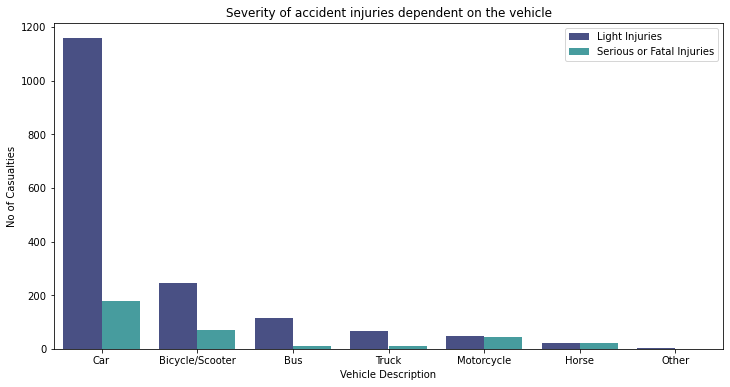

In [59]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x='Vehicle Description', 
            y='Casualty_Count', 
            hue = 'Casualty Severity Description', 
            data=Vehicle_Severity, 
            orient='v',
           palette='mako')
plt.legend(loc='upper right')
plt.title('Severity of accident injuries dependent on the vehicle') 
plt.ylabel('No of Casualties')
plt.xlabel('Vehicle Description')
plt.show()

In [60]:
Vehicle_casualties=df_2018.groupby(['Vehicle Description'])['Casualty Severity Description'].value_counts(normalize=True, ascending=False)
Vehicle_casualties

Vehicle Description  Casualty Severity Description
Bicycle/Scooter      Light Injuries                   0.780255
                     Serious or Fatal Injuries        0.219745
Bus                  Light Injuries                   0.905512
                     Serious or Fatal Injuries        0.094488
Car                  Light Injuries                   0.866118
                     Serious or Fatal Injuries        0.133882
Horse                Light Injuries                   0.500000
                     Serious or Fatal Injuries        0.500000
Motorcycle           Light Injuries                   0.526882
                     Serious or Fatal Injuries        0.473118
Other                Light Injuries                   0.750000
                     Serious or Fatal Injuries        0.250000
Truck                Light Injuries                   0.850000
                     Serious or Fatal Injuries        0.150000
Name: Casualty Severity Description, dtype: float64

### Age and Sex of Casualty

Could the gender and age of victims have statistically significant influence on the accident count and severity?

In [61]:
# add in a column with male / female gender description, compute the counts
df_2018['Gender'] = np.where(df_2018['Sex of Casualty'] == 1, 'Male', 
                                np.where(df_2018['Sex of Casualty'] == 2, 'Female', 'NA'))
df_2018['Gender'].value_counts()

Male      1176
Female     819
Name: Gender, dtype: int64

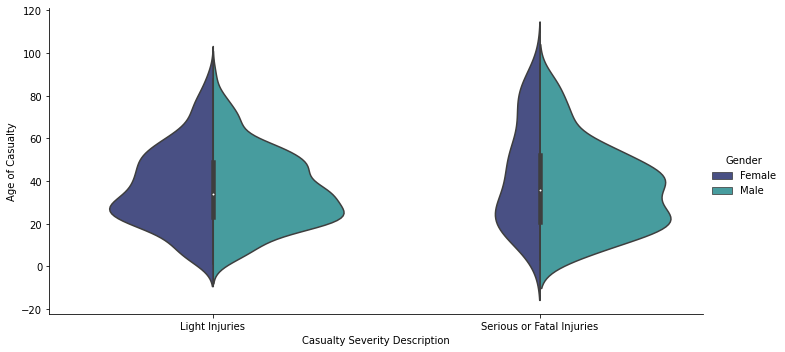

In [62]:
# plot the gender and age distribution over the Light and Serious/Fatal categories
sns.catplot(x='Casualty Severity Description', 
            y="Age of Casualty", 
            hue='Gender', 
            kind="violin", 
            split=True, 
            scale='count', 
            data=df_2018, 
            palette='mako',
            height=5, 
            aspect=2)

In [63]:
Gender_casualties=df_2018.groupby(['Gender'])['Casualty Severity Description'].value_counts(normalize=True, ascending=False)
Gender_casualties

Gender  Casualty Severity Description
Female  Light Injuries                   0.894994
        Serious or Fatal Injuries        0.105006
Male    Light Injuries                   0.786565
        Serious or Fatal Injuries        0.213435
Name: Casualty Severity Description, dtype: float64

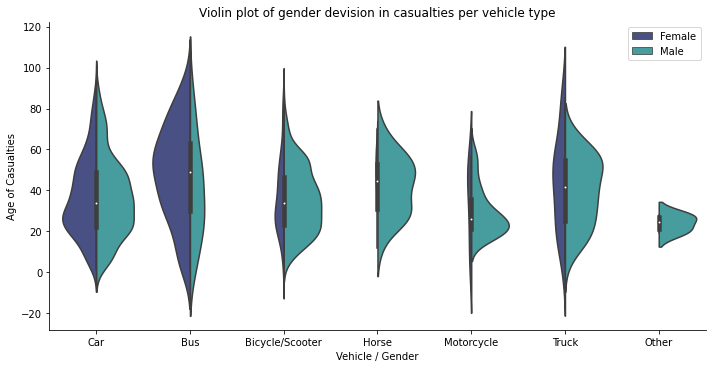

In [64]:
# relationship between chosen vehicle, age and gender
sns.catplot(x='Vehicle Description', xmin=0,
            y='Age of Casualty',
            data=df_2018, 
            palette='mako', 
            hue='Gender', 
            kind="violin", 
            split=True, 
            scale='count',
           height=5,
           aspect=2,
           legend=False)
plt.legend(loc='upper right')
plt.title('Violin plot of gender devision in casualties per vehicle type') 
plt.ylabel('Age of Casualties')
plt.xlabel('Vehicle / Gender')
plt.show()

### Casualty Severity Score

In order to measure the severity of accidents, we need to define accident severity and have a solid method for categorisation. 

In [65]:
# add a column with Casualty Severity value per accident to the data set. 
# it is a sum of all the Casualty Severity values of victims who were involved in the same accident
df_2018['CS Value'] = df_2018.groupby(['Accident Ref No'])['Casualty Severity'].transform(sum)
df_2018[['Accident Ref No','Number of Vehicles','Number of Casualties','CS Value']].tail(10)

,Accident Ref No,Number of Vehicles,Number of Casualties,CS Value
1985,5CR1051,2,1,1
1986,5CR1299,2,1,1
1987,5CU0470,2,1,2
1988,5CU0926,2,1,1
1989,5CU1803,2,1,1
1990,5CV0814,2,4,5
1991,5CV0814,2,4,5
1992,5CV0814,2,4,5
1993,5CV0814,2,4,5
1994,5CV1097,1,1,1


In [66]:
# add Severity Score Value column to the data set
# this is sum of overall Casualty Severity score of an accident and Number of Vehicles
df_2018['SS Value'] = df_2018['Number of Vehicles']+df_2018['CS Value']
df_2018[['Accident Ref No','Number of Vehicles','CS Value','SS Value']].tail(10)

,Accident Ref No,Number of Vehicles,CS Value,SS Value
1985,5CR1051,2,1,3
1986,5CR1299,2,1,3
1987,5CU0470,2,2,4
1988,5CU0926,2,1,3
1989,5CU1803,2,1,3
1990,5CV0814,2,5,7
1991,5CV0814,2,5,7
1992,5CV0814,2,5,7
1993,5CV0814,2,5,7
1994,5CV1097,1,1,2


In [67]:
df_2018['SS Value'].value_counts(sort=False)

2     309
3     760
4     441
5     231
6     139
7      34
8      28
9      25
10     12
11      9
16      7
Name: SS Value, dtype: int64

<AxesSubplot:xlabel='SS Value', ylabel='count'>

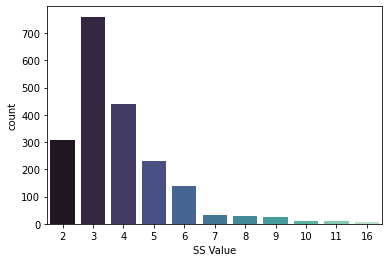

In [68]:
sns.countplot(x='SS Value', data=df_2018, palette='mako')

In [69]:
## running through some SS Values to get a feeling of how the accidents with different SS scores look like.
Descriptions=pd.DataFrame(df_2018[['Accident Ref No',
         'Number of Vehicles',
         'Time of day',
         'Season',
         'Road Surface Description',
         'Lighting Description',
         'Casualty Severity', 
         'Sex of Casualty', 
         'Age of Casualty',
         'SS Value']])
Descriptions[Descriptions['SS Value']==16].head(10)

,Accident Ref No,Number of Vehicles,Time of day,Season,Road Surface Description,Lighting Description,Casualty Severity,Sex of Casualty,Age of Casualty,SS Value
1038,56U0266,2,Night,Summer,Dry,"Dark, street lights",2,2,17,16
1039,56U0266,2,Night,Summer,Dry,"Dark, street lights",2,2,17,16
1040,56U0266,2,Night,Summer,Dry,"Dark, street lights",2,1,18,16
1041,56U0266,2,Night,Summer,Dry,"Dark, street lights",2,1,19,16
1042,56U0266,2,Night,Summer,Dry,"Dark, street lights",2,1,21,16
1043,56U0266,2,Night,Summer,Dry,"Dark, street lights",2,1,19,16
1044,56U0266,2,Night,Summer,Dry,"Dark, street lights",2,1,42,16


Adding to the df a column 'Severity Value' that will be the base categorisation data column (y) for the modelling. Because some models require numerical data, the catogories are set as numbers

(-1.0, 6.0)

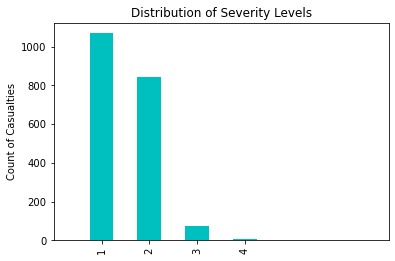

In [70]:
df_2018['Severity Level'] = np.where((df_2018['SS Value'] == 1), 0, 
                                np.where((df_2018['SS Value'] >= 2) & (df_2018['SS Value'] <= 3), 1,
                                np.where((df_2018['SS Value'] >= 4) & (df_2018['SS Value'] <= 7), 2,
                                np.where((df_2018['SS Value'] >= 8) & (df_2018['SS Value'] <= 13), 3,
                                np.where((df_2018['SS Value'] >= 14) & (df_2018['SS Value'] <= 25), 4,
                                np.where((df_2018['SS Value'] >= 26) & (df_2018['SS Value'] <= 50), 5,
                                np.where((df_2018['SS Value'] >= 50), 6,'NA'
                                )))))))
Severity_Levels=df_2018['Severity Level'].value_counts()
Severity_Levels.plot(kind='bar', color='c')
plt.title('Distribution of Severity Levels')
plt.ylabel('Count of Casualties')
plt.xlim(-1,6)

### Final Data Set for Modelling

In [71]:
df_2018.shape

(1995, 24)

In [72]:
df_2018.columns

Index(['Accident Ref No', 'Number of Vehicles', 'Accident Date', 'Time (24hr)',
       'Road Surface', 'Lighting Conditions', 'Weather Conditions',
       'Type of Vehicle', 'Casualty Severity', 'Sex of Casualty',
       'Age of Casualty', 'Casualty Severity Description',
       'Number of Casualties', 'Time of day', 'Season', 'Season Code',
       'Road Surface Description', 'Lighting Description',
       'Weather Description', 'Vehicle Description', 'Gender', 'CS Value',
       'SS Value', 'Severity Level'],
      dtype='object')

In [73]:
df_2018.head()

,Accident Ref No,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Severity,Sex of Casualty,...,Season,Season Code,Road Surface Description,Lighting Description,Weather Description,Vehicle Description,Gender,CS Value,SS Value,Severity Level
0,51B0230,1,2018-11-01,700,1,2,1,3,1,2,...,Autumn,3,Dry,"Dark, street lights",Fine,Car,Female,1,2,1
1,51B0349,1,2018-11-01,855,2,1,1,4,1,2,...,Autumn,3,Wet / Damp,Daylight,Fine,Bus,Female,5,6,2
2,51B0349,1,2018-11-01,855,2,1,1,4,1,2,...,Autumn,3,Wet / Damp,Daylight,Fine,Bus,Female,5,6,2
3,51B0349,1,2018-11-01,855,2,1,1,4,1,2,...,Autumn,3,Wet / Damp,Daylight,Fine,Bus,Female,5,6,2
4,51B0349,1,2018-11-01,855,2,1,1,4,1,2,...,Autumn,3,Wet / Damp,Daylight,Fine,Bus,Female,5,6,2


In [74]:
df_2018.to_csv('df_2018')

## Modelling

In [75]:
# have to make sure the sklearn is at least version .21 for the decision tree viz to work
!conda install scikit-learn=0.22 --y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - scikit-learn=0.22


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    ca-certificates-2020.7.22  |                0         125 KB
    certifi-2020.6.20          |           py36_0         156 KB
    joblib-0.16.0              |             py_0         210 KB
    openssl-1.1.1h             |       h7b6447c_0         2.5 MB
    scikit-learn-0.22.1        |   py36h22eb022_0         5.3 MB
    scipy-1.5.2                |   py36hab

### Test and train data sets

In [76]:
df_2018.columns

Index(['Accident Ref No', 'Number of Vehicles', 'Accident Date', 'Time (24hr)',
       'Road Surface', 'Lighting Conditions', 'Weather Conditions',
       'Type of Vehicle', 'Casualty Severity', 'Sex of Casualty',
       'Age of Casualty', 'Casualty Severity Description',
       'Number of Casualties', 'Time of day', 'Season', 'Season Code',
       'Road Surface Description', 'Lighting Description',
       'Weather Description', 'Vehicle Description', 'Gender', 'CS Value',
       'SS Value', 'Severity Level'],
      dtype='object')

In [77]:
# List all independent variables used for modelling, leave out the Casualty Severity number, but include the Number of Vehicles
X = df_2018[['Number of Vehicles','Season Code','Time (24hr)','Road Surface', 'Lighting Conditions', 'Weather Conditions',
       'Type of Vehicle','Sex of Casualty','Age of Casualty']]
X[0:5]

,Number of Vehicles,Season Code,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Sex of Casualty,Age of Casualty
0,1,3,700,1,2,1,3,2,87
1,1,3,855,2,1,1,4,2,60
2,1,3,855,2,1,1,4,2,51
3,1,3,855,2,1,1,4,2,50
4,1,3,855,2,1,1,4,2,51


In [78]:
# specify the dependent variable
y = df_2018['Severity Level'].values
y[0:5]

array(['1', '2', '2', '2', '2'], dtype=object)

In [79]:
# create train and test data sets, split it 75% for training and 25% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1596, 9) (1596,)
Test set: (399, 9) (399,)


In [80]:
# I use the KNN model first. Create a model, fit it, predict, sanity check
from sklearn.neighbors import KNeighborsClassifier
k = 7  
KNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
yhat_KNN = KNN_model.predict(X_test)
yhat_KNN[0:5]

array(['1', '2', '1', '2', '1'], dtype=object)

In [81]:
# find the best k and figure if the model is working
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    mean_acc[n-1]=np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.50877193, 0.52130326, 0.54385965, 0.53884712, 0.52130326,
       0.53884712, 0.56390977, 0.53884712, 0.55137845, 0.54385965,
       0.55889724, 0.54385965, 0.52882206, 0.53634085])

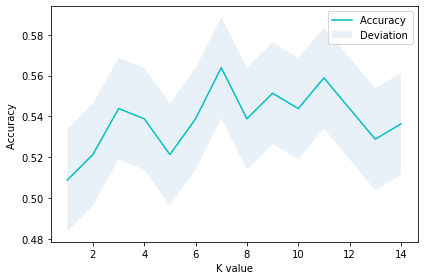

In [82]:
# plot the above
plt.plot(range(1,Ks),mean_acc,'c')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', 'Deviation'))
plt.ylabel('Accuracy ')
plt.xlabel('K value')
plt.tight_layout()
plt.show()

In [83]:
## The best accuracy with KNN
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
print("The best KNN accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
print("KNN Accuracy: ", metrics.accuracy_score(y_test, yhat_KNN))
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_KNN))
print("KNN F1-score: %.2f" % f1_score(y_test, yhat_KNN, average='weighted'))

The best KNN accuracy was with 0.5639097744360902 with k= 7
KNN Accuracy:  0.5639097744360902
KNN Jaccard index: 0.56
KNN F1-score: 0.55


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [84]:
## Also use Decision Tree model to find a categorisation, maybe this is more accurate
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train,y_train)
yhat_Tree = Tree.predict(X_test)
yhat_Tree

array(['2', '2', '2', '1', '2', '1', '1', '3', '2', '2', '1', '1', '1',
       '2', '2', '2', '1', '1', '1', '2', '1', '2', '2', '3', '2', '1',
       '2', '1', '1', '2', '2', '2', '2', '2', '2', '1', '1', '2', '2',
       '1', '2', '1', '2', '1', '2', '2', '2', '2', '2', '1', '1', '2',
       '2', '2', '1', '1', '2', '2', '2', '2', '2', '2', '2', '1', '2',
       '2', '2', '2', '2', '1', '1', '2', '1', '1', '2', '2', '2', '2',
       '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2',
       '1', '1', '2', '2', '2', '2', '2', '1', '2', '2', '1', '1', '1',
       '2', '2', '1', '1', '2', '1', '2', '1', '2', '1', '1', '2', '2',
       '1', '1', '2', '2', '2', '2', '1', '1', '2', '2', '1', '2', '2',
       '1', '1', '2', '2', '2', '2', '1', '1', '2', '1', '2', '1', '2',
       '1', '1', '2', '2', '2', '1', '2', '2', '2', '2', '1', '2', '2',
       '1', '2', '2', '1', '1', '1', '1', '2', '1', '2', '2', '2', '2',
       '1', '3', '1', '2', '1', '3', '2', '1', '1', '1', '2', '1

In [85]:
## Accuracy for Decision Tree
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat_Tree))
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_Tree))
print("DT F1-score: %.2f" % f1_score(y_test, yhat_Tree, average='weighted'))

DecisionTrees's Accuracy:  0.7393483709273183
DT Jaccard index: 0.74
DT F1-score: 0.73


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


<Figure size 720x720 with 0 Axes>

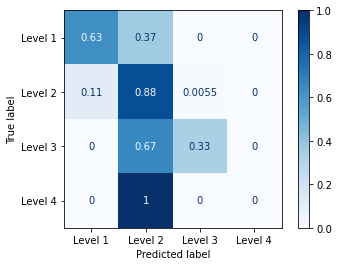

In [86]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(Tree, X_test, y_test, normalize='true',cmap=plt.cm.Blues, display_labels=('Level 1', 'Level 2', 'Level 3','Level 4'))

Decision Tree is clearly more accurate model for the current data set, so let's visualize it

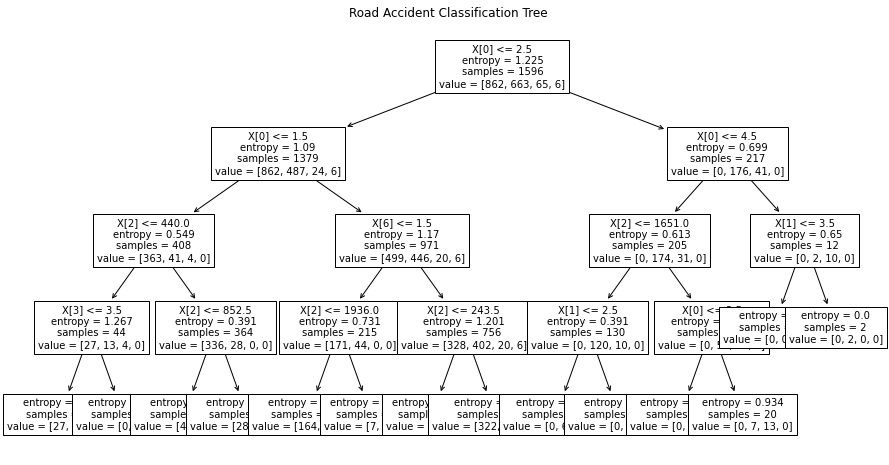

In [87]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(Tree, fontsize=10)
plt.title('Road Accident Classification Tree')
plt.savefig('Accident Decision Tree')
plt.show()

In [88]:
#looking at the above, it looks like the Time (24h) is causing lots of noise because of the amount of values. 
# Using the Time of day column instead to see if it makes the model more accurate, have to enumerate the values
df_2018['Time of Day Values'] = np.where(df_2018['Time of day'] =='Night',1,             
                                np.where(df_2018['Time of day'] =='Early Morning',2,
                                np.where(df_2018['Time of day'] =='Morning Rush Hour',3, 
                                np.where(df_2018['Time of day'] =='Late Morning',4,
                                np.where(df_2018['Time of day'] =='Afternoon',5,
                                np.where(df_2018['Time of day'] =='Afternoon Rush Hour',6,
                                np.where(df_2018['Time of day'] =='Evening',7,'NA'
                             )))))))
X_new = df_2018[['Number of Vehicles','Season Code','Time of Day Values','Road Surface', 'Lighting Conditions', 'Weather Conditions',
       'Type of Vehicle','Sex of Casualty','Age of Casualty']]
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=4)
Tree_new = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train_new,y_train)
yhat_Tree_new = Tree.predict(X_test_new)
Acc_score=metrics.accuracy_score(y_test, yhat_Tree_new)
print("New DecisionTrees's Accuracy: ", Acc_score)
# Looking at the below, it didn't make any difference, the model works as well without this additional work

New DecisionTrees's Accuracy:  0.7393483709273183


# Model Evaluation

Model evaluation is done with out-of-sample data set of relatively same size. It's the same kind of data set as the model was built on, just from year 2017.

In [89]:
df_2017 = pd.read_csv('https://query.data.world/s/7swoinykwekgy6yw4smakq3hhueozs')

In [90]:
df_2017.shape

(2203, 15)

In [91]:
df_2017.dtypes

Reference Number       object
Grid Ref: Easting       int64
Grid Ref: Northing      int64
Number of Vehicles      int64
Accident Date          object
Time (24hr)             int64
1st Road Class & No    object
Road Surface           object
Lighting Conditions    object
Weather Conditions     object
Type of Vehicle        object
Casualty Class         object
Casualty Severity      object
Sex of Casualty        object
Age of Casualty         int64
dtype: object

In [92]:
df_2017.head()

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,3AP0313,426340,428455,1,3/17/2017,815,A643,Dry,Daylight: Street lights present,Other,Car,Pedestrian,Serious,Female,61
1,3BE0850,430828,433222,2,1/14/2017,1330,A61,Dry,Daylight: Street lights present,Fine without high winds,Pedal cycle,Driver or rider,Slight,Male,36
2,4110858,428940,429856,2,1/1/2017,805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,32
3,4110858,428940,429856,2,1/1/2017,805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,30
4,4111495,429899,434277,2,1/1/2017,1705,U,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Car,Vehicle or pillion passenger,Slight,Female,26


The df_2017 dataset doesn't have the numeric values like the df_2018 does, so we need to make sure to add them and make all the same modifications as to df_2018  
We need to make sure we have the following data:  
- X (all numeric values): 'Number of Vehicles','Season Code','Time (24hr)','Road Surface', 'Lighting Conditions', 'Weather Conditions','Type of Vehicle','Sex of Casualty','Age of Casualty'  
- y: 'Severity Level', for which we also need to calculate CS Value and SS Value

In [93]:
df_2017.columns

Index(['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing',
       'Number of Vehicles', 'Accident Date', 'Time (24hr)',
       '1st Road Class & No', 'Road Surface', 'Lighting Conditions',
       'Weather Conditions', 'Type of Vehicle', 'Casualty Class',
       'Casualty Severity', 'Sex of Casualty', 'Age of Casualty'],
      dtype='object')

In [94]:
# Drop columns that are not relevant for the data to simplify the data set, set the column names to same as df_2018
df_2017.drop(columns=['Grid Ref: Easting',
              'Grid Ref: Northing',
              '1st Road Class & No',
              'Casualty Class'],inplace=True)
df_2017.rename(columns={'Reference Number':'Accident Ref No'}, inplace=True)

In [95]:
# Format Casualty Severity to match df_2018
df_2017['Casualty Severity'].value_counts()

Slight     1879
Serious     309
Fatal        15
Name: Casualty Severity, dtype: int64

In [96]:
# Format Casualty Severity to match Slight with Casual Severity 1 and Serious and Fatal with Severity 2. 
## Also need to rename the column because in df_2018 Casual Severity is numeric data
df_2017.rename(columns={'Casualty Severity':'Casualty Severity Description'}, inplace=True)
df_2017.head()

,Accident Ref No,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Severity Description,Sex of Casualty,Age of Casualty
0,3AP0313,1,3/17/2017,815,Dry,Daylight: Street lights present,Other,Car,Serious,Female,61
1,3BE0850,2,1/14/2017,1330,Dry,Daylight: Street lights present,Fine without high winds,Pedal cycle,Slight,Male,36
2,4110858,2,1/1/2017,805,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Slight,Male,32
3,4110858,2,1/1/2017,805,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Slight,Male,30
4,4111495,2,1/1/2017,1705,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Car,Slight,Female,26


In [97]:
df_2017['Casualty Severity'] = np.where(df_2017['Casualty Severity Description'] == 'Slight', 1.0, 
                                np.where(df_2017['Casualty Severity Description'] == 'Serious', 2.0,
                                np.where(df_2017['Casualty Severity Description'] == 'Fatal', 2.0,'NA'
                                )))
df_2017[['Casualty Severity','Casualty Severity Description']].tail(10)

,Casualty Severity,Casualty Severity Description
2193,1.0,Slight
2194,1.0,Slight
2195,1.0,Slight
2196,1.0,Slight
2197,1.0,Slight
2198,1.0,Slight
2199,1.0,Slight
2200,1.0,Slight
2201,2.0,Serious
2202,1.0,Slight


In [98]:
df_2017['Casualty Severity'].value_counts()

1.0    1879
2.0     324
Name: Casualty Severity, dtype: int64

In [99]:
# have to convert the dtype to float for the next calculation
df_2017['Casualty Severity']=df_2017['Casualty Severity'].astype(float)
df_2017['Casualty Severity'].dtype

dtype('float64')

In [100]:
# Add in columns for Casualty Severity (CS) Value and convert it into int so it can be used in calculations
df_2017['CS Value'] = df_2017.groupby(['Accident Ref No'])['Casualty Severity'].transform(sum)
df_2017['CS Value']=df_2017['CS Value'].astype(int)
CSValues=df_2017.groupby(['CS Value'])['Accident Ref No'].value_counts(normalize=True, ascending=False)
CSValues

CS Value  Accident Ref No
1         3BE0850            0.000881
          4111495            0.000881
          4111706            0.000881
          4121066            0.000881
          4130470            0.000881
                               ...   
7         49K0899            0.250000
          4630981            0.208333
8         46N1495            1.000000
9         42J1718            1.000000
12        4BP1859            1.000000
Name: Accident Ref No, Length: 1711, dtype: float64

In [101]:
## Add Severity Score (SS) Value for Severity Level calculations
df_2017['SS Value'] = df_2017['Number of Vehicles']+df_2017['CS Value']
df_2017[['Accident Ref No','Number of Vehicles','CS Value','SS Value']].tail(10)

,Accident Ref No,Number of Vehicles,CS Value,SS Value
2193,4CU1068,2,3,5
2194,4CU1068,2,3,5
2195,4CU1264,1,1,2
2196,4CV0870,2,1,3
2197,4CV0902,2,2,4
2198,4CV0902,2,2,4
2199,4CV1387,3,1,4
2200,4CV1544,2,1,3
2201,51B1932,2,2,4
2202,56R0735,2,1,3


(-1.0, 4.0)

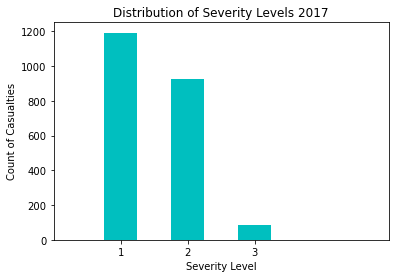

In [102]:
# Add in Severity Level numerical value column for the categorisation
df_2017['Severity Level'] = np.where((df_2017['SS Value'] == 1), 0, 
                                np.where((df_2017['SS Value'] >= 2) & (df_2017['SS Value'] <= 3), 1,
                                np.where((df_2017['SS Value'] >= 4) & (df_2017['SS Value'] <= 7), 2,
                                np.where((df_2017['SS Value'] >= 8) & (df_2017['SS Value'] <= 13), 3,
                                np.where((df_2017['SS Value'] >= 14) & (df_2017['SS Value'] <= 25), 4,
                                np.where((df_2017['SS Value'] >= 26) & (df_2017['SS Value'] <= 50), 5,
                                np.where((df_2017['SS Value'] >= 50), 6,'NA'
                                )))))))
Severity_Levels=df_2017['Severity Level'].value_counts()
Severity_Levels.plot(kind='bar', color='c')
plt.title('Distribution of Severity Levels 2017')
plt.xticks(rotation='horizontal')
plt.ylabel('Count of Casualties')
plt.xlabel('Severity Level')
plt.xlim(-1,4)

In [103]:
# convert object to time stamp dtype
df_2017['Accident Date'] = pd.to_datetime(df_2017['Accident Date'])
# add in a column with numerical value for a season where Spring = 1, Summer = 2, Autumn = 3 and Winter = 4
df_2017['Season Code'] = np.where(((df_2017['Accident Date'] >= '2017-01-01') & (df_2017['Accident Date'] <= '2017-02-28')), 4, 
                                np.where(((df_2017['Accident Date'] >= '2017-12-01') & (df_2017['Accident Date'] <= '2017-12-31')), 4,
                                np.where(((df_2017['Accident Date'] >= '2017-03-01') & (df_2017['Accident Date'] <= '2017-05-31')), 1,
                                np.where(((df_2017['Accident Date'] >= '2017-06-01') & (df_2017['Accident Date'] <= '2017-08-31')), 2,
                                np.where(((df_2017['Accident Date'] >= '2017-09-01') & (df_2017['Accident Date'] <= '2017-11-30')), 3, 'NA'
                                )))))
df_2017[['Accident Date','Season Code']].tail(10)

,Accident Date,Season Code
2193,2017-12-30,4
2194,2017-12-30,4
2195,2017-12-30,4
2196,2017-12-31,4
2197,2017-12-31,4
2198,2017-12-31,4
2199,2017-12-31,4
2200,2017-12-31,4
2201,2017-01-11,4
2202,2017-06-27,2


In [104]:
# Road Surface conditions formatting
df_2017.rename(columns={'Road Surface':'Road Surface Description'}, inplace=True)
df_2017['Road Surface Description'].value_counts()

Dry          1647
Wet/Damp      521
Frost/Ice      30
Snow            5
Name: Road Surface Description, dtype: int64

In [105]:
# Road Surface - add in the new column with numerical data
df_2017['Road Surface'] = np.where(df_2017['Road Surface Description'] == 'Dry', 1, 
                                    np.where(df_2017['Road Surface Description'] == 'Wet/Damp', 2, 
                                    np.where(df_2017['Road Surface Description'] == 'Snow', 3, 
                                    np.where(df_2017['Road Surface Description'] == 'Frost/Ice', 4, 'NA'
                                    ))))
df_2017['Road Surface'].value_counts()

1    1647
2     521
4      30
3       5
Name: Road Surface, dtype: int64

In [106]:
# Lighting Conditions formatting
df_2017.rename(columns={'Lighting Conditions':'Lighting Description'}, inplace=True)
df_2017['Lighting Description'].value_counts()

Daylight: Street lights present                    1181
Darkness: Street lights present and lit             534
Darkness: Street lighting unknown                   432
Darkness: No street lighting                         46
Darkness: Street lights present but unlit             9
Darkness: Street lights present and lit and lit       1
Name: Lighting Description, dtype: int64

In [107]:
# Lighting Conditions - add in the new column with numerical data
df_2017['Lighting Conditions']=np.where(df_2017['Lighting Description'] == 'Daylight: Street lights present', 1, 
                                np.where(df_2017['Lighting Description'] == 'Darkness: Street lights present and lit', 2, 
                                np.where(df_2017['Lighting Description'] == 'Darkness: Street lights present and lit and lit', 2, 
                                np.where(df_2017['Lighting Description'] == 'Darkness: No street lighting', 3, 
                                np.where(df_2017['Lighting Description'] == 'Darkness: Street lights present but unlit', 3, 
                                np.where(df_2017['Lighting Description'] == 'Darkness: Street lighting unknown', 4, 'NA'
                                ))))))
df_2017['Lighting Conditions'].value_counts()

1    1181
2     535
4     432
3      55
Name: Lighting Conditions, dtype: int64

In [108]:
# Weather Conditions formatting
df_2017.rename(columns={'Weather Conditions':'Weather Description'}, inplace=True)
df_2017['Weather Description'].value_counts()

Fine without high winds       1954
Raining without high winds     183
Raining with high winds         19
Other                           18
Fine with high winds            18
Snowing without high winds       6
Fog or mist (if hazard)          3
Snowing with high winds          2
Name: Weather Description, dtype: int64

In [109]:
# Weather Conditions - add in a new column with numerical data
df_2017['Weather Conditions'] = np.where(df_2017['Weather Description'] == 'Fine without high winds', 1,
                                np.where(df_2017['Weather Description'] == 'Raining without high winds', 2,
                                np.where(df_2017['Weather Description'] == 'Snowing without high winds', 3,
                                np.where(df_2017['Weather Description'] == 'Fine with high winds',4,
                                np.where(df_2017['Weather Description'] == 'Raining with high winds',5,
                                np.where(df_2017['Weather Description'] == 'Snowing with high winds',6,
                                np.where(df_2017['Weather Description'] == 'Fog or mist (if hazard)',7,
                                np.where(df_2017['Weather Description'] == 'Other',8,'NA'
                                ))))))))
df_2017['Weather Conditions'].value_counts()

1    1954
2     183
5      19
4      18
8      18
3       6
7       3
6       2
Name: Weather Conditions, dtype: int64

In [110]:
# Type of Vehicle formatting
df_2017.rename(columns={'Type of Vehicle':'Vehicle Description'}, inplace=True)
df_2017['Vehicle Description'].value_counts()

Car                                                                                           1431
Pedal cycle                                                                                    286
Pedal cyclePedal cycle                                                                         131
Motorcycle Motorcycle over 500cc0cc to 12Motorcycle over 500cccc                                86
Taxi/Private hire car                                                                           69
Pedal cycleCar                                                                                  63
Motorcycle over 500cc                                                                           51
Motorcycle 12Motorcycle over 500cccc to Motorcycle over 500cc00cc                               23
Motorcycle Motorcycle over 500cc0cc and under                                                   22
Motorcycle Motorcycle over 500cc0cc and under0                                                  11
Car0      

In [111]:
# Type of Vehicle - add in a new column with numerical data
df_2017['Type of Vehicle'] = np.where(df_2017['Vehicle Description'] == 'Pedal cycle', 1, 
                             np.where(df_2017['Vehicle Description'] == 'Pedal cyclePedal cycle', 1,
                             np.where(df_2017['Vehicle Description'] == 'Pedal cycle0', 1,
                             np.where(df_2017['Vehicle Description'] == 'Pedal cycleCar', 1,
                             np.where(df_2017['Vehicle Description'] == 'Motorcycle Motorcycle over 500cc0cc to 12Motorcycle over 500cccc', 2, 
                             np.where(df_2017['Vehicle Description'] == 'Motorcycle over 500cc', 2,
                             np.where(df_2017['Vehicle Description'] == 'Motorcycle 12Motorcycle over 500cccc to Motorcycle over 500cc00cc', 2,
                             np.where(df_2017['Vehicle Description'] == 'Motorcycle Motorcycle over 500cc0cc and under', 2,
                             np.where(df_2017['Vehicle Description'] == 'Motorcycle Motorcycle over 500cc0cc and under0', 2,
                             np.where(df_2017['Vehicle Description'] == 'Motorcycle Motorcycle over 500cc0cc and underPedal cycle', 2,
                             np.where(df_2017['Vehicle Description'] == 'Motorcycle Motorcycle over 500cc0cc and underMotorcycle Motorcycle over 500cc0cc and under', 2,
                             np.where(df_2017['Vehicle Description'] == 'Car', 3,
                             np.where(df_2017['Vehicle Description'] == 'Taxi/Private hire car', 3,
                             np.where(df_2017['Vehicle Description'] == 'Car0', 3,
                             np.where(df_2017['Vehicle Description'] == 'Car7', 3,
                             np.where(df_2017['Vehicle Description'] == 'CarTaxi/Private hire car', 3,'NA'
                            ))))))))))))))))
df_2017['Type of Vehicle'].value_counts()

3    1515
1     485
2     203
Name: Type of Vehicle, dtype: int64

In [112]:
# Sex of Casualty formatting
df_2017.rename(columns={'Sex of Casualty':'Gender'}, inplace=True)
df_2017['Gender'].value_counts()

Male      1250
Female     953
Name: Gender, dtype: int64

In [113]:
# Sex of Casualty - add new column with numeric values
df_2017['Sex of Casualty'] = np.where(df_2017['Gender'] =='Male', 1, 
                                np.where(df_2017['Gender'] =='Female',2, 'NA'))
df_2017['Sex of Casualty'].value_counts()

1    1250
2     953
Name: Sex of Casualty, dtype: int64

In [114]:
# Set up X and y for testing
X_2017=df_2017[['Number of Vehicles','Season Code','Time (24hr)','Road Surface', 'Lighting Conditions', 'Weather Conditions',
       'Type of Vehicle','Sex of Casualty','Age of Casualty']]
X_2017.head()

,Number of Vehicles,Season Code,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Sex of Casualty,Age of Casualty
0,1,1,815,1,1,8,3,2,61
1,2,4,1330,1,1,1,1,1,36
2,2,4,805,2,1,1,3,1,32
3,2,4,805,2,1,1,3,1,30
4,2,4,1705,2,2,2,3,2,26


In [115]:
y_2017=df_2017['Severity Level'].values
y_2017[0:5]

array(['1', '1', '2', '2', '1'], dtype=object)

In [116]:
# Test the Tree ML model using the X_2017 for prediction and y_2017 to see the accuracy
yhat_2017=Tree.predict(X_2017)
yhat_2017[10:30]

array(['2', '2', '1', '2', '1', '2', '2', '1', '2', '1', '2', '1', '2',
       '1', '2', '2', '2', '2', '2', '1'], dtype=object)

In [117]:
# assess the accuracy using the F1 and Jaccard scores
F1_Tree=f1_score(y_2017, yhat_2017, average='weighted')
Jaccard_Tree=jaccard_similarity_score(y_2017, yhat_2017)
print(F1_Tree, Jaccard_Tree)

0.6737878781083909 0.6799818429414435


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [118]:
# Plot the confusion matrix array to see where the model makes mistakes
from sklearn.metrics import confusion_matrix
confmatrix=confusion_matrix(y_2017, yhat_2017)
confmatrix

array([[713, 472,   8],
       [143, 773,  10],
       [ 16,  56,  12]])

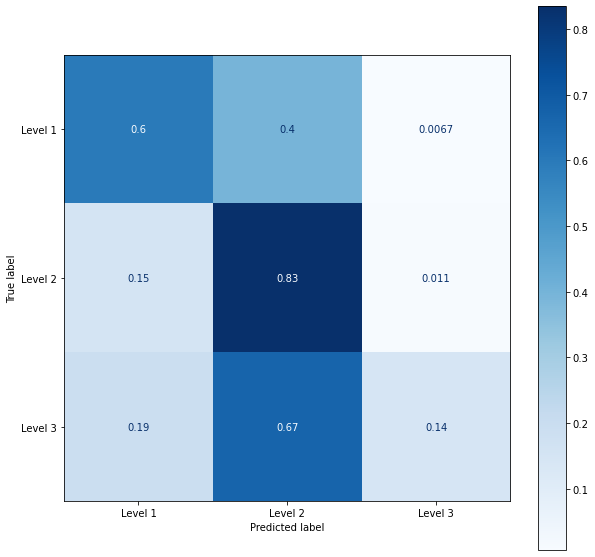

In [119]:
# visualize the confusion matrix
from sklearn.metrics import plot_confusion_matrix
fig,ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(Tree, X_2017, y_2017, normalize='true',cmap=plt.cm.Blues, 
                      display_labels=('Level 1', 'Level 2', 'Level 3'), ax=ax)

Text(0.5, 1.0, 'Confusion Matrix of True vs Predicted Values')

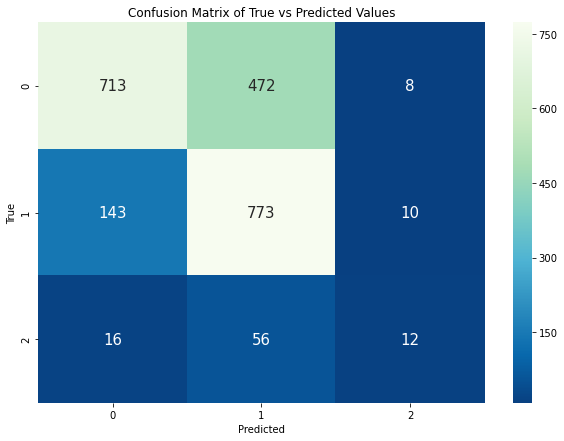

In [120]:
plt.figure(figsize = (10,7))
sns.heatmap(confmatrix, annot=True, annot_kws={"size": 15}, cmap="GnBu_r", fmt='g')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix of True vs Predicted Values')